<a href="https://colab.research.google.com/github/EmiHamada/Sunb_Box/blob/master/Pytourch/tutorial/Image_recognition_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TORCHVISION OBJECT DETECTION FINETUNING TUTORIAL
[画像認識系チュートリアル：物体検出](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html)

[Google Driveとデータ共有](https://blog.shikoan.com/google-colab-drive-save/)

In [1]:
from google.colab import drive
drive.mount('./gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./gdrive


In [21]:
! ls "./gdrive/My Drive/Colab Notebooks/PennFudanPed.zip (Unzipped Files)/PennFudanPed"

added-object-list.txt  Annotation  PedMasks  PNGImages	readme.txt


error: ignored

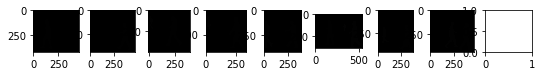

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

subfig = []

fig = plt.figure(figsize=(12, 9))

for i in range(1, 100 + 1):
  subfig.append(fig.add_subplot(10, 12, i))
  # とりあえず出す様に作成。桁数のところは使うときに改良
  img_bgr = cv2.imread("./gdrive/My Drive/Colab Notebooks/PennFudanPed.zip (Unzipped Files)/PennFudanPed/PedMasks/FudanPed0000"+ str(i+1) + "_mask.png")
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  subfig[i - 1].imshow(img_rgb)

fig.subplots_adjust(wspace = 0.3, hspace = 0.3)

plt.show()


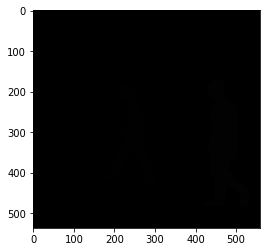

In [18]:
img_bgr = cv2.imread("./gdrive/My Drive/Colab Notebooks/PennFudanPed.zip (Unzipped Files)/PennFudanPed/PedMasks/FudanPed00001_mask.png")
plt.imshow(img_bgr)
plt.show()

In [0]:
import os
import numpy as np
import torch
from PIL import Image

root = "./gdrive/My Drive/Colab Notebooks/PennFudanPed.zip (Unzipped Files)/PennFudanPed"

class PennFudanPed(object):
  def __init__(self, root, transforms):
    self.root = root
    self.transforms = transforms
    self.imgs = 